In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<Axes: xlabel='Year'>

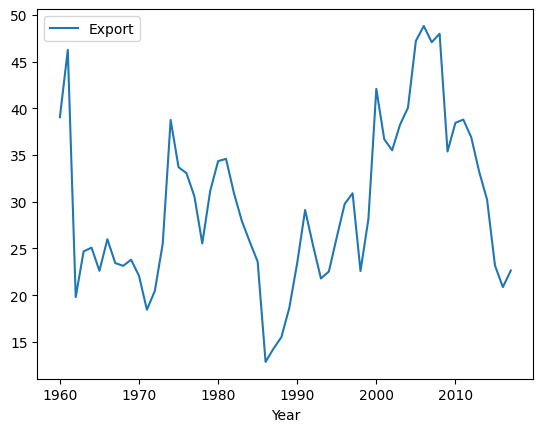

In [7]:
df = pd.read_csv('AlgeriaExport.csv')
df['Year'] = pd.RangeIndex(start=1960, stop=1960+len(df))
df.set_index('Year', inplace=True)
df.columns = ['Export']
df.asfreq('YS')
df.plot()

In [8]:
import math
train_len = math.floor(len(df)*0.8)
train_data = df.iloc[:train_len]
test_data = df.iloc[train_len:]

<Axes: xlabel='Year'>

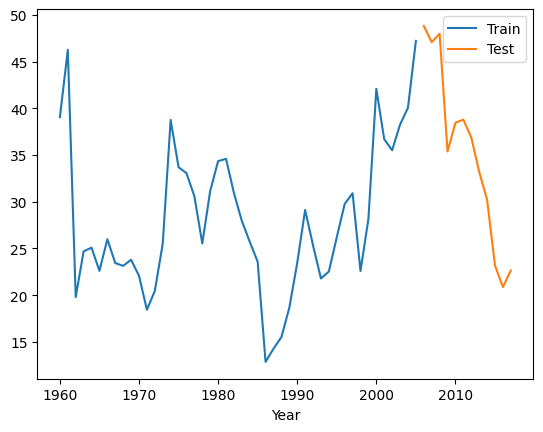

In [9]:
train_data['Export'].plot(legend=True, label='Train')
test_data['Export'].plot(legend=True, label='Test')

In [10]:
train_values = train_data['Export'].values
alpha = 0.7
l0 = train_values[0]
predicted_train_values = [l0]
for i in range(0, len(train_values) - 1):
    predicted_train_values.append(alpha * train_values[i] + (1 - alpha) * predicted_train_values[i])

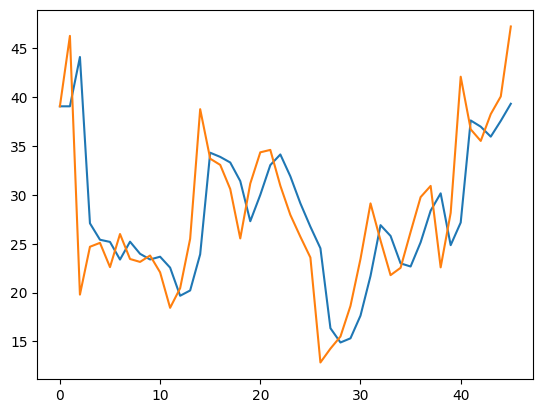

In [11]:
plt.plot(predicted_train_values)
plt.plot(train_values)

In [12]:
def ses(train_values, alpha, l0):
    predicted_train_values = [l0]
    for i in range(0, len(train_values) - 1):
        predicted_train_values.append(alpha * train_values[i] + (1 - alpha) * predicted_train_values[i])

    return predicted_train_values

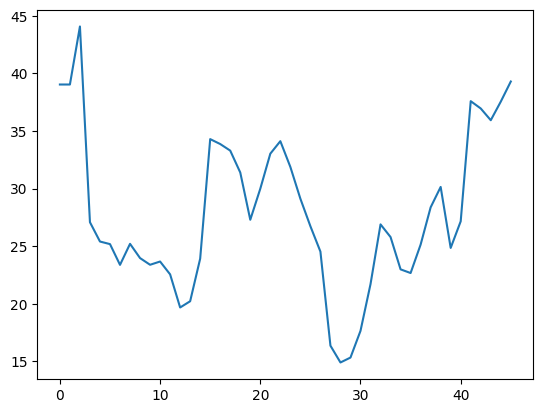

In [13]:
pdt = ses(train_values, 0.7, train_values[0])
plt.plot(pdt)

In [14]:
def sse(values, predictions):
    sum = 0
    for i in range(len(values)):
        sum += (values[i] - predictions[i]) ** 2
    return sum

In [15]:
sse(train_values, predicted_train_values)

1726.3480330567247

In [16]:
def ses_fit(train_values, dalpha):
    l0 = train_values[0]
    alpha_grid = np.arange(0, 1, dalpha)
    sse_list = []
    for alpha in alpha_grid:
        predicted_train_values = ses(train_values, alpha, l0)
        sse_list.append(sse(train_values, predicted_train_values))

    min_index = min(enumerate(sse_list), key=lambda x: x[1])[0]
    best_alpha = alpha_grid[min_index]

    return best_alpha

In [17]:
alpha = ses_fit(train_values, 0.01)
print(alpha)

0.78


In [18]:
def ses_predict(train_values, alpha, l0, h):
    predicted_train_values = ses(train_values, alpha, l0)
    one_step = alpha * train_values[-1] + (1 - alpha) * predicted_train_values[-1]
    h_steps = [one_step] * h

    return one_step, h_steps, predicted_train_values

In [19]:
one_step, h_steps, predicted_train_values = ses_predict(train_values, alpha, train_values[0], len(test_data))
h_steps

[45.51908069891785,
 45.51908069891785,
 45.51908069891785,
 45.51908069891785,
 45.51908069891785,
 45.51908069891785,
 45.51908069891785,
 45.51908069891785,
 45.51908069891785,
 45.51908069891785,
 45.51908069891785,
 45.51908069891785]

In [20]:
train_data['Fit'] = predicted_train_values
train_data.head()

C:\Users\Marcin\AppData\Local\Temp\ipykernel_2288\4213783463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Fit'] = predicted_train_values


,Export,Fit
Year,,
1960,39.043173,39.043173
1961,46.244557,39.043173
1962,19.793873,44.660252
1963,24.684682,25.264476
1964,25.084059,24.812237


In [21]:
test_data['Predicted'] = h_steps
test_data.head()

C:\Users\Marcin\AppData\Local\Temp\ipykernel_2288\2200921156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted'] = h_steps


,Export,Predicted
Year,,
2006,48.810688,45.519081
2007,47.068164,45.519081
2008,47.973345,45.519081
2009,35.371651,45.519081
2010,38.444548,45.519081


<Axes: xlabel='Year'>

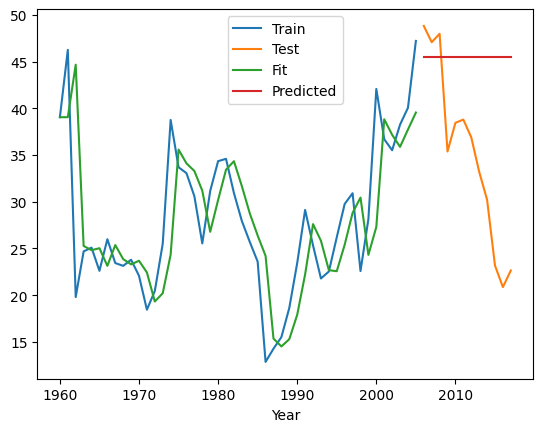

In [22]:
train_data['Export'].plot(legend=True, label='Train')
test_data['Export'].plot(legend=True, label='Test')
train_data['Fit'].plot(legend=True, label='Fit')
test_data['Predicted'].plot(legend=True, label='Predicted')

In [23]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [24]:
fit = SimpleExpSmoothing(train_data['Export'], initialization_method='estimated').fit()
fcast = fit.forecast(len(test_data)).rename(r"$\alpha=%s$" % fit.model.params['smoothing_level'])
fcast

C:\Users\Marcin\Desktop\studia\Time-Series-Analysis\Lab4\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Marcin\Desktop\studia\Time-Series-Analysis\Lab4\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Marcin\Desktop\studia\Time-Series-Analysis\Lab4\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


46    45.502508
47    45.502508
48    45.502508
49    45.502508
50    45.502508
51    45.502508
52    45.502508
53    45.502508
54    45.502508
55    45.502508
56    45.502508
57    45.502508
Name: $\alpha=0.7779992923273306$, dtype: float64